In [52]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu

#ограничение предупреждений
pd.options.mode.chained_assignment = None 

In [7]:
initial_data = pd.read_csv('/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Documents/HSE/1 семестр/Анализ данных и машинное обучение/ДЗ/Data/cookie_cats.csv')
initial_data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [8]:
#размер таблицы
initial_data.shape

(90189, 5)

In [9]:
#тип данных в таблице 
initial_data.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [10]:
#сбор статистики
print(
    f"""
    {initial_data.sum_gamerounds.min() = }
    {initial_data.sum_gamerounds.max() = }
    {initial_data.sum_gamerounds.mean() = }
    {initial_data.sum_gamerounds.median() = }
    {initial_data.sum_gamerounds.quantile(0.5) = }
    {initial_data.sum_gamerounds.std() = }
    {initial_data.sum_gamerounds.var() = }
    {initial_data.sum_gamerounds.count() = }
"""
)


    initial_data.sum_gamerounds.min() = np.int64(0)
    initial_data.sum_gamerounds.max() = np.int64(49854)
    initial_data.sum_gamerounds.mean() = np.float64(51.8724567297564)
    initial_data.sum_gamerounds.median() = np.float64(16.0)
    initial_data.sum_gamerounds.quantile(0.5) = np.float64(16.0)
    initial_data.sum_gamerounds.std() = np.float64(195.05085754200744)
    initial_data.sum_gamerounds.var() = np.float64(38044.837027872476)
    initial_data.sum_gamerounds.count() = np.int64(90189)



In [11]:
#среднее количество раундов по уровням 
initial_data.groupby('version', as_index=False).agg({'sum_gamerounds': 'count'}).rename(
    columns={'sum_gamerounds': 'total_gamerounds'}
).sort_values('version', ascending=True)

,version,total_gamerounds
0,gate_30,44700
1,gate_40,45489


In [12]:
#средний раунд по уровням 
initial_data.groupby('version', as_index=False).agg({'sum_gamerounds': 'mean'}).rename(
    columns={'sum_gamerounds': 'total_gamerounds'}
).sort_values('version', ascending=True)

,version,total_gamerounds
0,gate_30,52.456264
1,gate_40,51.298776


In [13]:
#фильтрация по 30 уровню
level_30_raw = initial_data[
    (initial_data['version'] == 'gate_30')
]
level_30_raw.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
14,2218,gate_30,305,True,True
15,2382,gate_30,73,True,False
16,2392,gate_30,14,True,False
17,2451,gate_30,204,True,True
18,2482,gate_30,108,True,True


In [14]:
#фильтрация по 40 уровню 
level_40 = initial_data[
    (initial_data['version'] == 'gate_40')
]
level_40.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False
10,1842,gate_40,3,False,True
12,2132,gate_40,30,True,False
19,2502,gate_40,1,False,False


In [15]:
#описательная статистика
level_30_raw['sum_gamerounds'].describe().round(2)

count    44700.00
mean        52.46
std        256.72
min          0.00
25%          5.00
50%         17.00
75%         50.00
max      49854.00
Name: sum_gamerounds, dtype: float64

In [16]:
level_40['sum_gamerounds'].describe().round(2)

count    45489.00
mean        51.30
std        103.29
min          0.00
25%          5.00
50%         16.00
75%         52.00
max       2640.00
Name: sum_gamerounds, dtype: float64

In [17]:
statistics = pd.DataFrame(
    {
        'Описательная статистика': [
            'Среднее',
            'Мода',
            'Медиана',
            'Минимум',
            'Максимум',
            'Размах',
            'Дисперсия',
            'Стандартное отклонение'],
        'level_30': [
            level_30_raw.sum_gamerounds.mean().round(2),
            level_30_raw.sum_gamerounds.value_counts().index[0].round(2),
            level_30_raw.sum_gamerounds.median().round(2),
            level_30_raw.sum_gamerounds.min().round(2),
            level_30_raw.sum_gamerounds.max().round(2),
            level_30_raw.sum_gamerounds.max()-level_30_raw.sum_gamerounds.min().round(2),
            level_30_raw.sum_gamerounds.var().round(2),
            level_30_raw.sum_gamerounds.std().round(2)],
        'level_40': [
            level_40.sum_gamerounds.mean().round(2),
            level_40.sum_gamerounds.value_counts().index[0].round(2),
            level_40.sum_gamerounds.median().round(2),
            level_40.sum_gamerounds.min().round(2),
            level_40.sum_gamerounds.max().round(2),
            level_40.sum_gamerounds.max()-level_40.sum_gamerounds.min().round(2),
            level_40.sum_gamerounds.var().round(2),
            level_40.sum_gamerounds.std().round(2)],
    }
)
statistics

,Описательная статистика,level_30,level_40
0,Среднее,52.46,51.30
1,Мода,1.00,1.00
2,Медиана,17.00,16.00
3,Минимум,0.00,0.00
4,Максимум,49854.00,2640.00
5,Размах,49854.00,2640.00
6,Дисперсия,65903.32,10669.74
7,Стандартное отклонение,256.72,103.29


In [18]:
#подсчет количества значений
level_30_raw['sum_gamerounds'].value_counts()

sum_gamerounds
1       2749
2       2198
0       1937
3       1899
4       1831
        ... 
1272       1
595        1
743        1
1072       1
498        1
Name: count, Length: 779, dtype: int64

In [19]:
level_40['sum_gamerounds'].value_counts()

sum_gamerounds
1       2789
2       2408
3       2059
0       2057
4       1798
        ... 
2063       1
846        1
768        1
546        1
708        1
Name: count, Length: 792, dtype: int64

In [20]:
#квантили
quantile = pd.DataFrame(
    {
        'quantile': [
            'Квантиль 0.1',
            'Квантиль 0.3',
            'Квантиль 0.7',
            'Квантиль 0.9'],
        'level_30': [
            level_30_raw.sum_gamerounds.quantile(0.1),
            level_30_raw.sum_gamerounds.quantile(0.3),
            level_30_raw.sum_gamerounds.quantile(0.7),
            level_30_raw.sum_gamerounds.quantile(0.9)],
        'level_40': [
            level_40.sum_gamerounds.quantile(0.1),
            level_40.sum_gamerounds.quantile(0.3),
            level_40.sum_gamerounds.quantile(0.7),
            level_40.sum_gamerounds.quantile(0.9)],
    }
)
quantile

,quantile,level_30,level_40
0,Квантиль 0.1,1.0,1.0
1,Квантиль 0.3,6.0,6.0
2,Квантиль 0.7,40.0,40.0
3,Квантиль 0.9,135.0,134.0


In [21]:
#квартили
quartile = pd.DataFrame(
    {
        'quartile': [
            'Квартиль 0.25',
            'Квартиль 0.5',
            'Квартиль 0.75'],
        'level_30': [
            level_30_raw.sum_gamerounds.quantile(0.25),
            level_30_raw.sum_gamerounds.quantile(0.5),
            level_30_raw.sum_gamerounds.quantile(0.75)],
        'level_40': [
            level_40.sum_gamerounds.quantile(0.25),
            level_40.sum_gamerounds.quantile(0.5),
            level_40.sum_gamerounds.quantile(0.75)],
    }
)
quartile

,quartile,level_30,level_40
0,Квартиль 0.25,5.0,5.0
1,Квартиль 0.5,17.0,16.0
2,Квартиль 0.75,50.0,52.0


<Axes: xlabel='sum_gamerounds', ylabel='Count'>

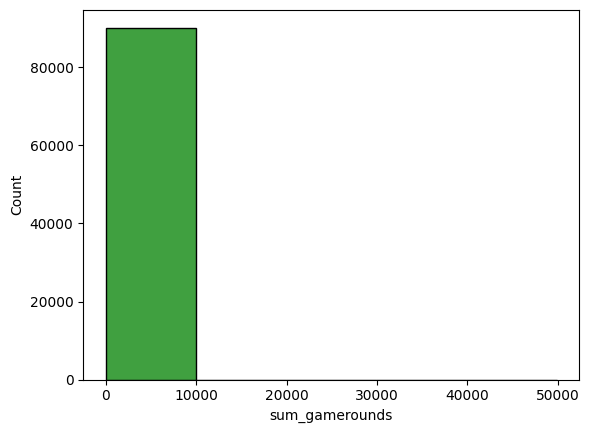

In [22]:
#гистограмма частот
sns.histplot(initial_data.sum_gamerounds, bins=5, color = 'green')

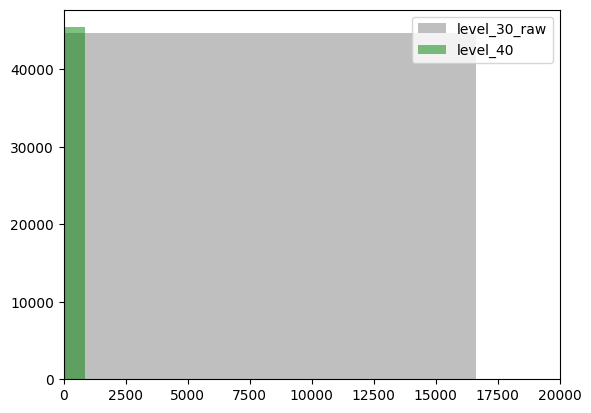

In [23]:
#гистограмма частот
plt.hist(level_30_raw['sum_gamerounds'], alpha=0.5, label='level_30_raw', color='grey', bins=3)
plt.hist(level_40['sum_gamerounds'], alpha=0.5, label='level_40', color='green', bins=3)
plt.xlim(0, 20000) 
plt.legend()
plt.show()

<Axes: ylabel='sum_gamerounds'>

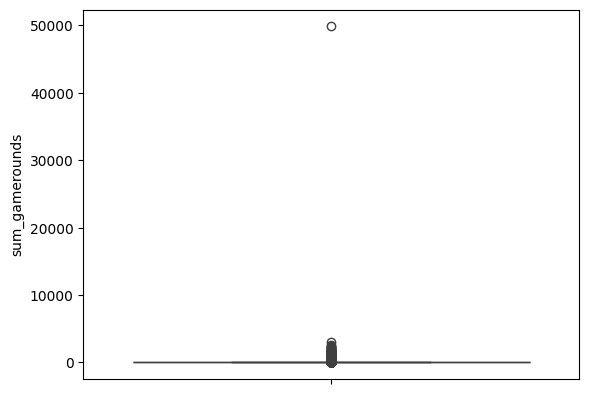

In [24]:
#ящик с усами
sns.boxplot(initial_data.sum_gamerounds)

<Axes: >

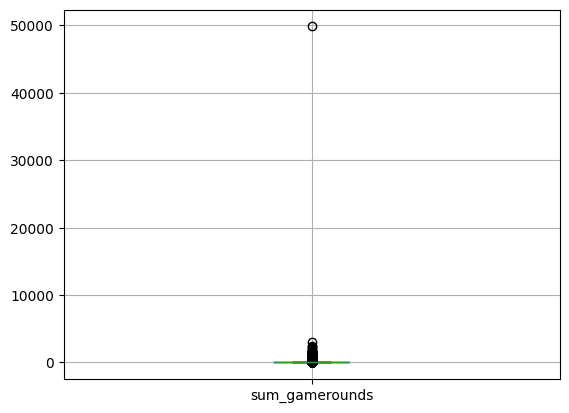

In [25]:
level_30_raw.boxplot('sum_gamerounds')

<Axes: >

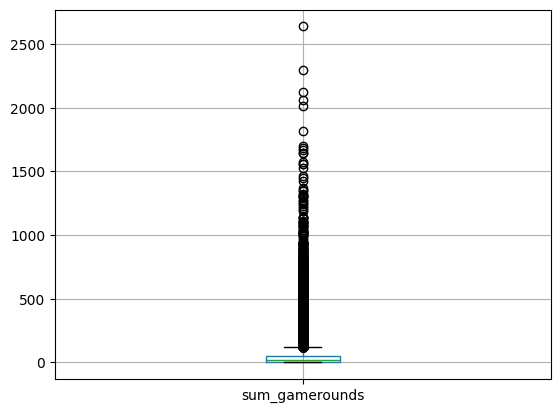

In [26]:
level_40.boxplot('sum_gamerounds')

In [27]:
#поиск выбросов в данных
initial_data.sum_gamerounds.sort_values(ascending=False)

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
         ...  
41476        0
41405        0
63580        0
63582        0
63583        0
Name: sum_gamerounds, Length: 90189, dtype: int64

In [28]:
#удаление выброса
data = initial_data[initial_data['sum_gamerounds'] != 49854]

In [29]:
#фильтрация по уровням без выброса
level_30 = data[
    (data['version'] == 'gate_30')
]

In [30]:
#описательная статистика без выброса
statistics_cleaned = pd.DataFrame(
    {
        'Описательная статистика': [
            'Среднее',
            'Мода',
            'Медиана',
            'Минимум',
            'Максимум',
            'Размах',
            'Дисперсия',
            'Стандартное отклонение'],
        'level_30': [
            level_30.sum_gamerounds.mean().round(2),
            level_30.sum_gamerounds.value_counts().index[0].round(2),
            level_30.sum_gamerounds.median().round(2),
            level_30.sum_gamerounds.min().round(2),
            level_30.sum_gamerounds.max().round(2),
            level_30.sum_gamerounds.max()-level_30.sum_gamerounds.min().round(2),
            level_30.sum_gamerounds.var().round(2),
            level_30.sum_gamerounds.std().round(2)],
        'level_40': [
            level_40.sum_gamerounds.mean().round(2),
            level_40.sum_gamerounds.value_counts().index[0].round(2),
            level_40.sum_gamerounds.median().round(2),
            level_40.sum_gamerounds.min().round(2),
            level_40.sum_gamerounds.max().round(2),
            level_40.sum_gamerounds.max()-level_40.sum_gamerounds.min().round(2),
            level_40.sum_gamerounds.var().round(2),
            level_40.sum_gamerounds.std().round(2)],
    }
)
statistics_cleaned

,Описательная статистика,level_30,level_40
0,Среднее,51.34,51.30
1,Мода,1.00,1.00
2,Медиана,17.00,16.00
3,Минимум,0.00,0.00
4,Максимум,2961.00,2640.00
5,Размах,2961.00,2640.00
6,Дисперсия,10415.75,10669.74
7,Стандартное отклонение,102.06,103.29


In [31]:
#квантили
quantile = pd.DataFrame(
    {
        'quantile': [
            'Квантиль 0.1',
            'Квантиль 0.3',
            'Квантиль 0.7',
            'Квантиль 0.9'],
        'level_30': [
            level_30.sum_gamerounds.quantile(0.1),
            level_30.sum_gamerounds.quantile(0.3),
            level_30.sum_gamerounds.quantile(0.7),
            level_30.sum_gamerounds.quantile(0.9)],
        'level_40': [
            level_40.sum_gamerounds.quantile(0.1),
            level_40.sum_gamerounds.quantile(0.3),
            level_40.sum_gamerounds.quantile(0.7),
            level_40.sum_gamerounds.quantile(0.9)],
    }
)
quantile

,quantile,level_30,level_40
0,Квантиль 0.1,1.0,1.0
1,Квантиль 0.3,6.0,6.0
2,Квантиль 0.7,40.0,40.0
3,Квантиль 0.9,135.0,134.0


In [32]:
#квартили
quartile = pd.DataFrame(
    {
        'quartile': [
            'Квартиль 0.25',
            'Квартиль 0.5',
            'Квартиль 0.75'],
        'level_30': [
            level_30.sum_gamerounds.quantile(0.25),
            level_30.sum_gamerounds.quantile(0.5),
            level_30.sum_gamerounds.quantile(0.75)],
        'level_40': [
            level_40.sum_gamerounds.quantile(0.25),
            level_40.sum_gamerounds.quantile(0.5),
            level_40.sum_gamerounds.quantile(0.75)],
    }
)
quartile

,quartile,level_30,level_40
0,Квартиль 0.25,5.0,5.0
1,Квартиль 0.5,17.0,16.0
2,Квартиль 0.75,50.0,52.0


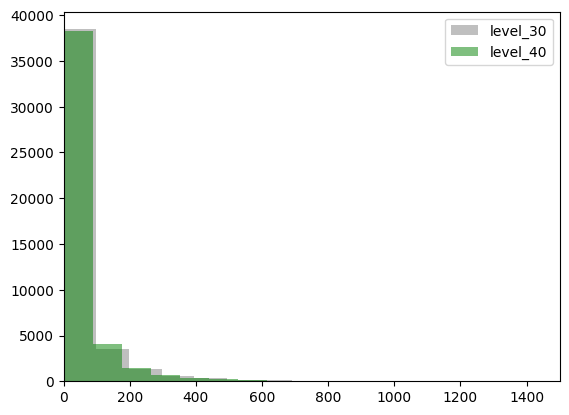

In [33]:
#гистограмма частот
plt.hist(level_30['sum_gamerounds'], alpha=0.5, label='level_30', color='grey', bins=30)
plt.hist(level_40['sum_gamerounds'], alpha=0.5, label='level_40', color='green', bins=30)
plt.xlim(0, 1500) 
plt.legend()
plt.show()

<Axes: >

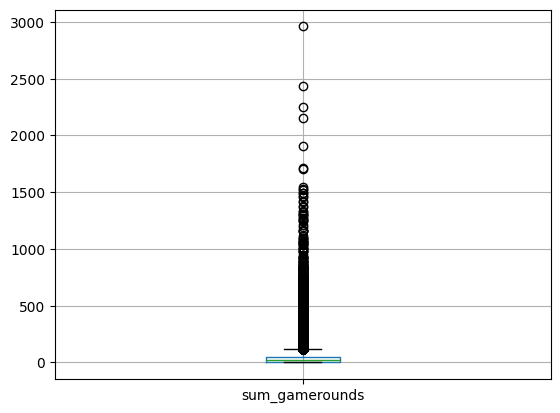

In [34]:
level_30.boxplot('sum_gamerounds')

In [35]:
#поиск и замена пропущенных значений
data[
    (data['sum_gamerounds'] == np.nan)
]
data['sum_gamerounds'] = data['sum_gamerounds'].replace(np.nan, 0)

In [36]:
#поиск выбросов - межквартильный размах
Q1_30 = level_30['sum_gamerounds'].quantile(0.25)
Q3_30 = level_30['sum_gamerounds'].quantile(0.75)
IQR_30 = Q3_30 - Q1_30

level_30[
    (level_30['sum_gamerounds'] < Q1_30 - 1.5 * IQR_30) | (level_30['sum_gamerounds'] > Q3_30 + 1.5 * IQR_30)
]

,userid,version,sum_gamerounds,retention_1,retention_7
14,2218,gate_30,305,True,True
17,2451,gate_30,204,True,True
45,4929,gate_30,386,True,True
53,5661,gate_30,136,True,False
75,7767,gate_30,139,True,True
...,...,...,...,...,...
90088,9987669,gate_30,151,True,True
90096,9988827,gate_30,119,True,False
90121,9991145,gate_30,328,True,True
90134,9991949,gate_30,191,True,True


In [37]:
Q1_40 = level_40['sum_gamerounds'].quantile(0.25)
Q3_40 = level_40['sum_gamerounds'].quantile(0.75)
IQR_40 = Q3_40 - Q1_40

level_40[
    (level_40['sum_gamerounds'] < Q1_40 - 1.5 * IQR_40) | (level_40['sum_gamerounds'] > Q3_40 + 1.5 * IQR_40)
]

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
9,1587,gate_40,153,True,False
34,3993,gate_40,202,True,True
...,...,...,...,...,...
90031,9981465,gate_40,149,True,True
90074,9986582,gate_40,298,False,False
90115,9990636,gate_40,569,True,True
90125,9991408,gate_40,186,True,True


In [38]:
#поиск выбросов - Z-оценка
level_30['z_score'] = (level_30['sum_gamerounds'] - level_30.sum_gamerounds.mean()) / level_30.sum_gamerounds.std()

level_30[abs(level_30['z_score']) > 3]

,userid,version,sum_gamerounds,retention_1,retention_7,z_score
45,4929,gate_30,386,True,True,3.279108
275,26586,gate_30,391,True,False,3.328100
320,31903,gate_30,467,True,True,4.072778
401,40378,gate_30,552,True,True,4.905641
442,45698,gate_30,452,True,True,3.925802
...,...,...,...,...,...,...
89664,9943022,gate_30,587,True,True,5.248584
89840,9962662,gate_30,381,True,True,3.230116
89907,9968698,gate_30,496,True,True,4.356931
89921,9971042,gate_30,892,True,True,8.237093


In [39]:
level_40['z_score'] = (level_40['sum_gamerounds'] - level_40.sum_gamerounds.mean()) / level_40.sum_gamerounds.std()

level_40[abs(level_40['z_score']) > 3]

,userid,version,sum_gamerounds,retention_1,retention_7,z_score
237,22299,gate_40,493,True,True,4.276138
394,39774,gate_40,567,True,True,4.992537
541,56496,gate_40,543,True,True,4.760192
551,57369,gate_40,399,True,True,3.366118
640,68394,gate_40,474,True,True,4.092198
...,...,...,...,...,...,...
89719,9949589,gate_40,708,True,True,6.357568
89759,9953704,gate_40,502,True,True,4.363268
89813,9960649,gate_40,494,True,True,4.285820
89902,9968196,gate_40,442,True,True,3.782404


In [40]:
#поиск выбросов - метод трех сигм
lower_bound_sigma_30 = level_30.sum_gamerounds.mean() - 3 * level_30.sum_gamerounds.std()
upper_bound_sigma_30 = level_30.sum_gamerounds.mean() + 3 * level_30.sum_gamerounds.std()

level_30[
    (level_30['sum_gamerounds'] < lower_bound_sigma_30) | (level_30['sum_gamerounds'] > upper_bound_sigma_30)
]

,userid,version,sum_gamerounds,retention_1,retention_7,z_score
45,4929,gate_30,386,True,True,3.279108
275,26586,gate_30,391,True,False,3.328100
320,31903,gate_30,467,True,True,4.072778
401,40378,gate_30,552,True,True,4.905641
442,45698,gate_30,452,True,True,3.925802
...,...,...,...,...,...,...
89664,9943022,gate_30,587,True,True,5.248584
89840,9962662,gate_30,381,True,True,3.230116
89907,9968698,gate_30,496,True,True,4.356931
89921,9971042,gate_30,892,True,True,8.237093


In [41]:
lower_bound_sigma_40 = level_40.sum_gamerounds.mean() - 3 * level_40.sum_gamerounds.std()
upper_bound_sigma_40 = level_40.sum_gamerounds.mean() + 3 * level_40.sum_gamerounds.std()

level_40[
    (level_40['sum_gamerounds'] < lower_bound_sigma_40) | (level_40['sum_gamerounds'] > upper_bound_sigma_40)
]

,userid,version,sum_gamerounds,retention_1,retention_7,z_score
237,22299,gate_40,493,True,True,4.276138
394,39774,gate_40,567,True,True,4.992537
541,56496,gate_40,543,True,True,4.760192
551,57369,gate_40,399,True,True,3.366118
640,68394,gate_40,474,True,True,4.092198
...,...,...,...,...,...,...
89719,9949589,gate_40,708,True,True,6.357568
89759,9953704,gate_40,502,True,True,4.363268
89813,9960649,gate_40,494,True,True,4.285820
89902,9968196,gate_40,442,True,True,3.782404


In [42]:
#поиск выбросов - метод перцентилей
level_30[
    (level_30['sum_gamerounds'] < level_30.sum_gamerounds.quantile(0.01)) | (level_30['sum_gamerounds'] > level_30.sum_gamerounds.quantile(0.99))
]

,userid,version,sum_gamerounds,retention_1,retention_7,z_score
401,40378,gate_30,552,True,True,4.905641
601,63617,gate_30,902,True,True,8.335077
615,64930,gate_30,510,True,False,4.494108
655,69927,gate_30,1906,True,True,18.172659
865,97308,gate_30,798,True,True,7.316044
...,...,...,...,...,...,...
88281,9785969,gate_30,572,True,True,5.101608
88708,9834954,gate_30,536,True,True,4.748866
89664,9943022,gate_30,587,True,True,5.248584
89907,9968698,gate_30,496,True,True,4.356931


In [43]:
#поиск выбросов - метод перцентилей
level_40[
    (level_40['sum_gamerounds'] < level_40.sum_gamerounds.quantile(0.01)) | (level_40['sum_gamerounds'] > level_40.sum_gamerounds.quantile(0.99))
]

,userid,version,sum_gamerounds,retention_1,retention_7,z_score
237,22299,gate_40,493,True,True,4.276138
394,39774,gate_40,567,True,True,4.992537
541,56496,gate_40,543,True,True,4.760192
1264,139072,gate_40,681,False,True,6.096179
1707,185512,gate_40,934,True,True,8.545488
...,...,...,...,...,...,...
89317,9903612,gate_40,546,True,True,4.789235
89719,9949589,gate_40,708,True,True,6.357568
89759,9953704,gate_40,502,True,True,4.363268
89813,9960649,gate_40,494,True,True,4.285820


In [44]:
#статистичская проверка гипотез - критерий Колмогорова-Смирнова
first = level_30.sum_gamerounds
second = level_40.sum_gamerounds

stat_k, p_value_k = stats.kstest(first, second)

print(f"stat: {stat_k}\np-value: {p_value_k}")

if p_value_k < 0.05: print("нулевая гипотеза отвергается")
else:              print("нулевая гипотеза принимается")

stat: 0.010258010418840668
p-value: 0.01727609923280408
нулевая гипотеза отвергается


In [45]:
#t-тест
stat_t, p_value_t = stats.ttest_ind(first, second)

print(f"stat: {stat_t}\np-value: {p_value_t}")

if p_value_t < 0.05: print("нулевая гипотеза отвергается")
else:              print("нулевая гипотеза принимается")

stat: 0.0633675766982082
p-value: 0.9494739458256001
нулевая гипотеза принимается


In [54]:
#критерий Манна-Уитни
stat_m, p_value_m = mannwhitneyu(first, second, alternative='two-sided')
print(f"stat: {stat_m}\np-value: {p_value_m}")

if p_value_m < 0.05: print("нулевая гипотеза отвергается")
else:              print("нулевая гипотеза принимается")

stat: 1024285761.5
p-value: 0.05089155279145376
нулевая гипотеза принимается


In [55]:
#критерий Уилкоксона
stat_w, p_value_w = wilcoxon(first[:1000], second[:1000])
print(f"stat: {stat_w}\np-value: {p_value_w}")

if p_value_w < 0.05: print("нулевая гипотеза отвергается")
else:              print("нулевая гипотеза принимается")

stat: 231162.0
p-value: 0.19241871313465142
нулевая гипотеза принимается
